In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]] ## 과외로 공부한 시간 추가

## x1,x2,y의 데이터값
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data] ## 과외 시간
y_data = [y_row[2] for y_row in data]

In [79]:
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed = 0)) ## uniform으로는 범위를 정해서 사용할수 있다
## 우리가 값이 이정도 나오겠구나를 예측 가능해서
b = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed = 0))
c = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed = 0))

#그래프 선언
#y에 대한 일차 방정식
y = (a*x1) +(b*x2) +c

#텐서플로우 rmse(Root Mean Square Error, 평균 제곱근 편차) 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

learning_rate = 0.01
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    #변수 초기화
    sess.run(tf.global_variables_initializer())
    #2001번 실행
    for step in range(2001):
        sess.run(gradient_descent)
        #100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch:%.f, RMSE = %.04f, x1계수 a = %.4f,x2계수 b = %.4f, y 절편 c = %.4f" % (step, sess.run(rmse), sess.run(a) ,sess.run(b),sess.run(c)))
        
        y_predict = []
        if step == 0  or step == 2000 :
            for i in range(len(x1)) :
                y = int(sess.run(a))*x1[i] + int(sess.run(b))*x2[i] + sess.run(c)
                print(y)
                y_predict.append(int(y))
                          

Epoch:0, RMSE = 52.4800, x1계수 a = 8.0148,x2계수 b = 8.0437, y 절편 c = 80.6809
[96.6809166]
[144.6809166]
[144.6809166]
[168.6809166]
Epoch:100, RMSE = 16.1029, x1계수 a = 2.6323,x2계수 b = 5.4828, y 절편 c = 79.7601
Epoch:200, RMSE = 1.9789, x1계수 a = 0.6250,x2계수 b = 3.6776, y 절편 c = 79.3031
Epoch:300, RMSE = 0.8996, x1계수 a = 1.0697,x2계수 b = 2.7527, y 절편 c = 79.1536
Epoch:400, RMSE = 0.4921, x1계수 a = 1.3268,x2계수 b = 2.2932, y 절편 c = 78.8650
Epoch:500, RMSE = 0.3886, x1계수 a = 1.3969,x2계수 b = 2.2530, y 절편 c = 78.5570
Epoch:600, RMSE = 0.3219, x1계수 a = 1.4351,x2계수 b = 2.2634, y 절편 c = 78.3025
Epoch:700, RMSE = 0.2875, x1계수 a = 1.4617,x2계수 b = 2.2725, y 절편 c = 78.1203
Epoch:800, RMSE = 0.2739, x1계수 a = 1.4783,x2계수 b = 2.2782, y 절편 c = 78.0061
Epoch:900, RMSE = 0.2693, x1계수 a = 1.4879,x2계수 b = 2.2815, y 절편 c = 77.9400
Epoch:1000, RMSE = 0.2679, x1계수 a = 1.4933,x2계수 b = 2.2834, y 절편 c = 77.9030
Epoch:1100, RMSE = 0.2675, x1계수 a = 1.4963,x2계수 b = 2.2844, y 절편 c = 77.8824
Epoch:1200, RMSE = 0.2673, x1계수

[79, 89, 87, 91]
[81, 93, 91, 97]


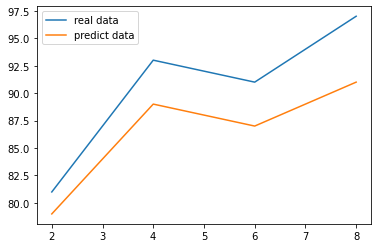

In [80]:
import matplotlib.pyplot as plt 
## 학습률 = 0.01, rmse = 0.26
print(y_predict)
print(y_data)
plt.plot(x1, y_data)
plt.plot(x1, y_predict)
plt.legend(['real data', 'predict data'], loc = 'upper left')
plt.show()

## 몸무게, 나이에 따른 혈중 지방 함량 예측

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

## 실행할 때마다 같은 결과를 출력하기 위해 설정
np.random.seed(3)

## 준비된 수술 환자 데이터를 불러드립니다
Data_set = np.loadtxt("blood_fat.csv", delimiter=',')
print(len(Data_set))

25


In [105]:
print(Data_set) ## 몸무게, 나이, 혈중 지방 함량

[[ 84.  46. 354.]
 [ 73.  20. 190.]
 [ 65.  52. 405.]
 [ 70.  30. 263.]
 [ 76.  57. 451.]
 [ 69.  25. 302.]
 [ 63.  28. 288.]
 [ 72.  36. 385.]
 [ 79.  57. 402.]
 [ 75.  44. 365.]
 [ 27.  24. 209.]
 [ 89.  31. 290.]
 [ 65.  52. 346.]
 [ 57.  23. 254.]
 [ 59.  60. 395.]
 [ 69.  48. 434.]
 [ 60.  34. 220.]
 [ 79.  51. 374.]
 [ 75.  50. 308.]
 [ 82.  34. 220.]
 [ 59.  46. 311.]
 [ 67.  23. 181.]
 [ 85.  37. 274.]
 [ 55.  40. 303.]
 [ 63.  30. 244.]]


In [155]:
## x1,x2,y의 데이터값
x1 = [x_row1[0] for x_row1 in Data_set] ## 몸무게
x2 = [x_row2[1] for x_row2 in Data_set] ## 나이
y_data = [y_row[2] for y_row in Data_set] ## 혈중 지방

a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed = 0))
c = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed = 0))

y = (a*x1) +(b*x2) +c

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

learning_rate = 0.01
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    #변수 초기화
    sess.run(tf.global_variables_initializer())
    #2001번 실행
    for step in range(2001):
        sess.run(gradient_descent)
        #100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch:%.f, RMSE=%.04f, x1계수 a=%.4f,x2계수 b=%.4f, y 절편 c=%.4f" % (step, sess.run(rmse), sess.run(a) ,sess.run(b),sess.run(c)))
            
            a1 = sess.run(a)
            b1 = sess.run(b)
            c1 = sess.run(c)
       
        y_predict = []
        if step == 2000 :
            for i in range(len(x1)) :
                y = int(sess.run(a))*x1[i] + int(sess.run(b))*x2[i] + sess.run(c)
                y_predict.append(int(y))
        

Epoch:0, RMSE=586.3051, x1계수 a=7.3734,x2계수 b=7.6736, y 절편 c=80.6803
Epoch:100, RMSE=41.3953, x1계수 a=0.4367,x2계수 b=5.1183, y 절편 c=80.5873
Epoch:200, RMSE=41.3817, x1계수 a=0.3906,x2계수 b=5.1990, y 절편 c=80.5854
Epoch:300, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2037, y 절편 c=80.5836
Epoch:400, RMSE=41.3816, x1계수 a=0.3878,x2계수 b=5.2040, y 절편 c=80.5818
Epoch:500, RMSE=41.3816, x1계수 a=0.3878,x2계수 b=5.2040, y 절편 c=80.5800
Epoch:600, RMSE=41.3816, x1계수 a=0.3878,x2계수 b=5.2040, y 절편 c=80.5783
Epoch:700, RMSE=41.3816, x1계수 a=0.3878,x2계수 b=5.2040, y 절편 c=80.5765
Epoch:800, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2040, y 절편 c=80.5747
Epoch:900, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2040, y 절편 c=80.5729
Epoch:1000, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2040, y 절편 c=80.5712
Epoch:1100, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2040, y 절편 c=80.5694
Epoch:1200, RMSE=41.3816, x1계수 a=0.3879,x2계수 b=5.2041, y 절편 c=80.5676
Epoch:1300, RMSE=41.3816, x1계수 a=0.3880,x2계수 b=5.2041, y 절편 c=80.5659
Epoch:1400, RMSE=41.3816, x1계수 

In [156]:
num = np.arange(1,len(x1)+1).tolist()

In [157]:
number = dict(zip(num, Data_set.tolist()))

[354.0, 190.0, 405.0, 263.0, 451.0, 302.0, 288.0, 385.0, 402.0, 365.0, 209.0, 290.0, 346.0, 254.0, 395.0, 434.0, 220.0, 374.0, 308.0, 220.0, 311.0, 181.0, 274.0, 303.0, 244.0]
[310, 180, 340, 230, 365, 205, 220, 260, 365, 300, 200, 235, 340, 195, 380, 320, 250, 335, 330, 250, 310, 195, 265, 280, 230]


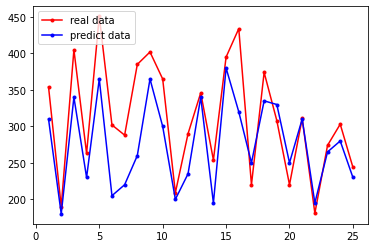

In [158]:
print(y_data)
print(y_predict)

## 학습률 0.01
plt.plot(number.keys(), y_data, 'r.-')
plt.plot(number.keys(), y_predict, 'b.-')
plt.legend(['real data', 'predict data'], loc = 'upper left')
plt.show()

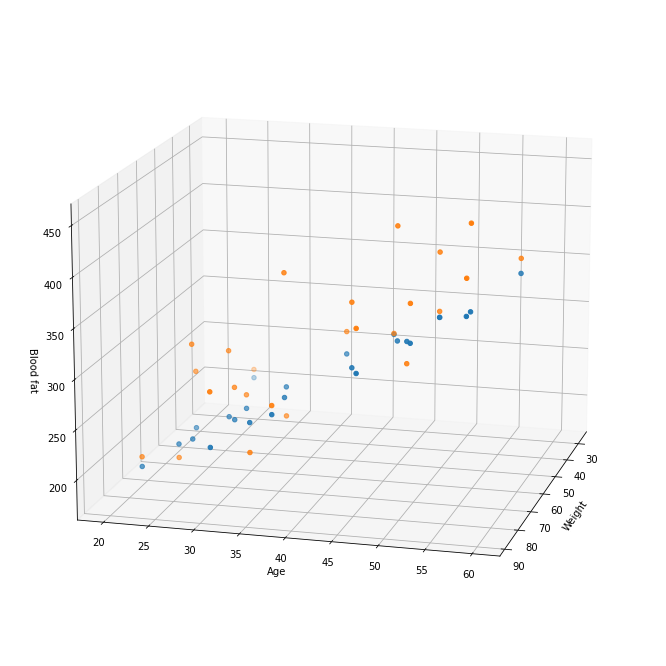

In [168]:
from mpl_toolkits.mplot3d import Axes3D

##graph
##figure
fig = plt.figure(figsize = (12,12))
## 전제 공간을 1*1로 잡은 중 첫번째, 3d로 표시, 전체 공간을 나누는 개념
ax = fig.add_subplot(111, projection = '3d')
## 산점도 플롯을 만듦
ax.scatter(x1,x2,y_predict)
ax.scatter(x1,x2,y_data)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)
plt.show()
## graph view-end

## 시그모이드

In [219]:
## x,y의 데이터 값
data = [[2,0],[4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

## a와 b의 값을 임의로 정한다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed = 0)) ## normal을 사용한 이유는 범위X
## 값이 이정도 나오겠다 라는 범위가 없어서 normal
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed = 0))

## y 시그모이드 함수의 방정식을 세운다.
y = 1/(1+np.e**(-(a*x_data+b)))

In [222]:
## loss 구하는 함수
loss = -tf.reduce_mean(np.array(y_data)*tf.log(y) + (1 - np.array(y_data))*tf.log(1-y))

learning_rate = 0.5

## loss를 최소로 하는 값 찾기
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predict = [5,7,13]
## 학습
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for i in range(60001) :
        sess.run(gradient_descent)
        if i%6000 == 0 :
            print("Epoch:%.f, loss = %.04f, 기울기 a = %.4f, y절편 = %.4f" 
                  % (i, sess.run(loss), sess.run(a) ,sess.run(b)))
        if i==60000 : ## 5,7,13 값 확인해보기
            for j in predict :
                y = 1/(1+np.e**(-(sess.run(a)*j+(sess.run(b)))))
                print(y)
                ## 7은 0.53....

Epoch:0, loss = 4.0817, 기울기 a = 2.4706, y절편 = -0.3620
Epoch:6000, loss = 0.0152, 기울기 a = 2.9230, y절편 = -20.3114
Epoch:12000, loss = 0.0081, 기울기 a = 3.5648, y절편 = -24.8081
Epoch:18000, loss = 0.0055, 기울기 a = 3.9564, y절편 = -27.5511
Epoch:24000, loss = 0.0041, 기울기 a = 4.2385, y절편 = -29.5268
Epoch:30000, loss = 0.0033, 기울기 a = 4.4590, y절편 = -31.0705
Epoch:36000, loss = 0.0028, 기울기 a = 4.6399, y절편 = -32.3371
Epoch:42000, loss = 0.0024, 기울기 a = 4.7933, y절편 = -33.4107
Epoch:48000, loss = 0.0021, 기울기 a = 4.9263, y절편 = -34.3424
Epoch:54000, loss = 0.0019, 기울기 a = 5.0439, y절편 = -35.1653
Epoch:60000, loss = 0.0017, 기울기 a = 5.1491, y절편 = -35.9020
[3.88235157e-05]
[0.53537986]
[1.]


In [226]:
x = tf.constant([[1.0,2.0,3.0]])
w = tf.constant([[2.0],[2.0],[2.0]])
y = tf.matmul(x,w)
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)

print(result)

(1, 3)
[[12.]]


In [227]:
x = tf.Variable([[1.,2.,3.]], dtype=tf.float32)
w = tf.constant([[2.0],[2.0],[2.0]], dtype = tf.float32)
y = tf.matmul(x,w)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y)
print(result)

[[12.]]


In [229]:
input_data = [[1,2,3],[1,2,3],[2,3,4]]

x = tf.placeholder(dtype=tf.float32, shape = [None, 3])
w = tf.constant([[2.0],[2.0],[2.0]], dtype = tf.float32)
y = tf.matmul(x,w)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y, feed_dict={x:input_data})

print(result)

[[12.]
 [12.]
 [18.]]


## 브로드 캐스트

In [ ]:
## 행렬 연산에서 차워이 맞지 않을떄, 
## 행렬을 자동으로 늘려줘서 차원을 맞춰주는 개념
## 늘리는 것은 가능하지만 줄이는 것은 불가능하다

## 4X2와 1X3를 더하는 연산에서 
## 1X3을 4X3으로 만들어주고 4X2를 4X3으로 만들어주는 것 

In [232]:
input_data = [[1,1,1], [2,2,2]]

x = tf.placeholder(dtype=tf.float32, shape = [2, 3])
w = tf.constant([[2.0],[2.0],[2.0]], dtype = tf.float32)
b = tf.Variable([4], dtype = tf.float32)
y = tf.matmul(x,w) + b
print(x.get_shape())

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y, feed_dict={x:input_data})

print(result)

(2, 3)
[[10.]
 [16.]]


In [242]:
x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

X = tf.placeholder(tf.float64, shape = [None, 2])
a = tf.Variable(tf.random_uniform([2,1], dtype = tf.float64))
b = tf.Variable([7], dtype = tf.float64)

y = tf.sigmoid(tf.matmul(X,a) +b)

# y = 1/(1+np.e**(-(a*x_data+b)))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
result = sess.run(y, feed_dict={X:x_data, y:y_data})

print(result)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [250]:
## 답

## 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

## x,y의 데이터 값
x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

## 입력 값을 플레이스 홀더에 저장
X = tf.placeholder(tf.float64, shape = [None, 2])
Y = tf.placeholder(tf.float64, shape = [None, 1])

a = tf.Variable(tf.random_uniform([2,1], dtype = tf.float64))
b = tf.Variable(tf.random_uniform([1], dtype = tf.float64))

## 시그모이드 방정식
y = tf.sigmoid(tf.matmul(X,a) +b)

## 오차 구하는 함수
loss = -tf.reduce_mean(np.array(y_data)*tf.log(y) + (1 - np.array(y_data))*tf.log(1-y))

learning_rate = 0.1

gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


predicted = tf.cast(y>0.5, dtype = tf.float64)
accuarcy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float64))

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for i in range(3001) :
        a_, b_, loss_, _ = sess.run([a,b,loss, gradient_descent], feed_dict={X:x_data, Y:y_data})
        
        if (i+1)%300 == 0 :
            print("step = %d, a1 = %.4f, a2 = %.4f,b = %.4f, loss = %.4f" 
                  % (i+1, a_[0], a_[1] ,b_, loss_))
    print("predicted = ", sess.run(predicted, feed_dict={X:x_data}))

    ## 다른 값 테스트
    p_val, h_val = sess.run([predicted, y], feed_dict={X:[[1,5],[10,5], [4,5]]})
    print("check predicted = ", p_val)
    print("check hypothesis = ", h_val)
    
    ## 정확도 측정
    h,c,a = sess.run([y,predicted, accuarcy], feed_dict={X:x_data, Y:y_data})
    print("\n Hypothesis: ", h, "\n Correct (Y) : ", c, "\nAccuracy : ", a)

step = 300, a1 = 0.8021, a2 = -0.5120,b = -2.5590, loss = 0.2590
step = 600, a1 = 0.7992, a2 = -0.2427,b = -3.9899, loss = 0.1873
step = 900, a1 = 0.7127, a2 = 0.0762,b = -5.0331, loss = 0.1471
step = 1200, a1 = 0.6129, a2 = 0.3749,b = -5.8618, loss = 0.1208
step = 1500, a1 = 0.5173, a2 = 0.6418,b = -6.5508, loss = 0.1022
step = 1800, a1 = 0.4305, a2 = 0.8778,b = -7.1411, loss = 0.0885
step = 2100, a1 = 0.3531, a2 = 1.0866,b = -7.6576, loss = 0.0779
step = 2400, a1 = 0.2845, a2 = 1.2723,b = -8.1169, loss = 0.0695
step = 2700, a1 = 0.2236, a2 = 1.4384,b = -8.5304, loss = 0.0628
step = 3000, a1 = 0.1692, a2 = 1.5881,b = -8.9066, loss = 0.0572
predicted =  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted =  [[0.]
 [1.]
 [0.]]
check hypothesis =  [[0.31089978]
 [0.67387457]
 [0.42832459]]

 Hypothesis:  [[0.02179661]
 [0.03030078]
 [0.17666605]
 [0.87827255]
 [0.98021571]
 [0.99706935]
 [0.99957215]] 
 Correct (Y) :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  1.0
